<a href="https://colab.research.google.com/github/Shin-GC/Study_for_ML/blob/main/%EC%83%9D%EC%84%A0_%EB%B6%84%EB%A5%98_%EB%AC%B8%EC%A0%9C_Level3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

평균(mean): [ 27.29722222 454.09722222]
표준편차(std): [  9.98244253 323.29893931]
브로드 캐스팅 후 값 
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34

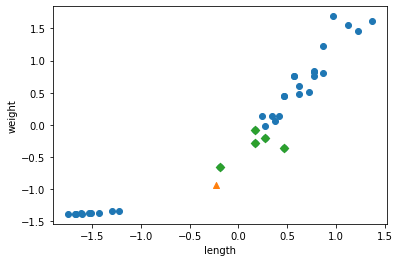

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

import matplotlib.pyplot as plt

distances, indexes = kn.kneighbors([[25,150]])


train_input[indexes]
train_target[indexes]
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(f"평균(mean): {mean}")
print(f"표준편차(std): {std}")

train_scaled = (train_input - mean) /std

print(f"브로드 캐스팅 후 값 \n{train_scaled}")

new = ([25,150] - mean) / std

test_scaled = (test_input - mean ) / std # 훈련 세트와 같게 테스트 세트 또한 변환을 해주어 스케일을 같게 만들어 준다.

kn.fit(train_scaled, train_target) #모델 Training , 스케일 값을 바꿔 준 샘플값과 정답이 들어있는 target으로 Training

kn.score(test_scaled, test_target) #샘플이 담긴 test_scaled 를 Training한 kn 변수에 넣어 정답이 들어 있는 test_target 과 같은 값이 나오는가 채점하기
kn.predict([new]) # 새로운 값 넣고 확인하기! [ 도미 확인 성공!]
distances, indexes = kn.kneighbors([new]) # 25cm에 150g의 도미 값을 넣어 가까운 위치에 있는 값의 거리차이를 distances에 그 값의 샘플을 indexes에 저장 [defualt = 5]
plt.scatter(train_scaled[:,0], train_scaled[:,1]) # train의 길이 [:,0] 와 무게 [:,1]를 넣는다
plt.scatter(new[0],new[1], marker = '^') #새로운 값의 길이 [0] 무게 [1] 를 넣는다
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
# 새로운 값과 가까운 위치에 있는 값의 샘플을 indexes 넣고 길이인 0 과 무게인 1 값 넣기 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()